# CRISP-DM in Action #

In this notebook, I shal guide you through the process of apllying CRISP-DM in a data science workflow.

For the purpose of showcasing the process, we shall assume we are a data scientist in a automobile/car company. And are given a dataset on automobile prices along with their featuree.

## Business Understanding ##

### Objective: ###
To analyze and predict the **critical temperature (Tc)** of superconducting materials based on their physical and chemical properties, providing insights into material performance and aiding in the discovery of new superconductors.

### Business Goals: ###

1. Understand the key factors that influence the **critical temperature (Tc)** of superconductors (e.g., chemical composition, material properties).
2. Develop a predictive model that can estimate the **critical temperature** of a material based on its features.
3. Provide insights into material properties that lead to high-performing superconductors, helping researchers and engineers in the field.

### Key Business Questions: ###

1. What physical and chemical properties most influence the **critical temperature (Tc)** of superconductors?
2. Can we predict the **critical temperature (Tc)** based on a material's features like atomic number, chemical composition, and other properties?
3. What trends can be identified in the **critical temperature** across different types of superconducting materials?
4. Are there specific patterns or relationships between material properties and **critical temperature (Tc)**?
5. Can the **critical temperature** prediction help in the development of new superconducting materials?

### Target Audience: ###

1. **Researchers** in material science and superconductivity.
2. **Engineers** working on designing and developing new superconducting materials.
3. **Manufacturers** of superconducting materials who want to optimize their product performance.
4. **Academics** looking for insights into the factors that influence superconductivity.

### Success Criteria: ###

1. Development of a successful **regression model** to predict the **critical temperature (Tc)** with good accuracy.
2. Clear understanding of which material properties are the strongest predictors of the **critical temperature**.
3. Actionable insights that can aid in the identification of high-performing superconductors.
4. Model deployment for real-time predictions of **critical temperature (Tc)** based on material features.


## Data Understanding & Preperation ##

### For detailed information: https://archive.ics.uci.edu/dataset/464/superconductivty+data ###

The dataset does not have any missing values as per the source website, so we can skip fixing missing values.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import zipfile
import io
import requests

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
# Add the missing headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
           "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
           "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df = df.replace('?', np.nan)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [6]:
# Find columns with any missing values
missing_cols = df.columns[df.isnull().any()]

# Loop only over columns with missing values
for col in missing_cols:
    print(df[col].isnull().value_counts())
    print() 

normalized-losses
False    164
True      40
Name: count, dtype: int64

num-of-doors
False    202
True       2
Name: count, dtype: int64

bore
False    200
True       4
Name: count, dtype: int64

stroke
False    200
True       4
Name: count, dtype: int64

horsepower
False    202
True       2
Name: count, dtype: int64

peak-rpm
False    202
True       2
Name: count, dtype: int64

price
False    200
True       4
Name: count, dtype: int64



#### Data type mismatch in:
| Column                | Should be |
| --------------------- | --------- |
|  1. normalized-losses | float64   |
| 18. bore              | float64   |
| 19. stroke            | float64   |
| 21. horsepower        | float64   |
| 22. peak-rpm          | float64   |
| 25. price             | float64   |

In [7]:
# Fix data types
to_float = [
    "normalized-losses",
    "bore",
    "stroke",
    "horsepower",
    "peak-rpm",
    "price"
]

for col in to_float:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

# Fix format mismatch
# Convert mpg to L/100km
df['city-L/100km'] = 235 / df['city-mpg']
df['highway-L/100km'] = 235 / df['highway-mpg']

df = df.drop(['city-mpg', 'highway-mpg'], axis=1)

### Preprocessaing starts

In [8]:
# Remove rows with null prices
df = df.dropna(subset=['price'], axis=0)

In [9]:
# Divide data fra,e into target and features
y = df['price']
X = df.drop(columns='price')

In [10]:
# Divide features into numerical and categorical featueres
X_numerical = X.select_dtypes(include=['int64', 'float64'])
X_categorical = X.drop(columns=X_numerical.columns)

In [11]:
# Repopulate missing numerical values
num_imputer = SimpleImputer(strategy='median')

X_numerical = pd.DataFrame(
    num_imputer.fit_transform(X_numerical),
    columns=X_numerical.columns,
    index=X_numerical.index
)

# Repopulate missing categorical values
cat_imputer = SimpleImputer(strategy='most_frequent')

X_categorical = pd.DataFrame(
    cat_imputer.fit_transform(X_categorical),
    columns=X_categorical.columns,
    index=X_categorical.index
)

In [15]:
# Applying Standardscaler
scaler = StandardScaler()
X_numerical = pd.DataFrame(
    scaler.fit_transform(X_numerical),
    columns=X_numerical.columns,
    index=X_numerical.index
)

# Applying One-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop_first avoids multicollinearity
X_categorical = pd.DataFrame(
    encoder.fit_transform(X_categorical),
    columns=encoder.get_feature_names_out(X_categorical.columns),
    index=X_categorical.index
)

In [16]:
X = pd.concat([X_numerical, X_categorical], axis=1)
df = pd.concat([X, y], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                200 non-null    float64
 1   normalized-losses        200 non-null    float64
 2   wheel-base               200 non-null    float64
 3   length                   200 non-null    float64
 4   width                    200 non-null    float64
 5   height                   200 non-null    float64
 6   curb-weight              200 non-null    float64
 7   engine-size              200 non-null    float64
 8   bore                     200 non-null    float64
 9   stroke                   200 non-null    float64
 10  compression-ratio        200 non-null    float64
 11  horsepower               200 non-null    float64
 12  peak-rpm                 200 non-null    float64
 13  city-L/100km             200 non-null    float64
 14  highway-L/100km          200 no

### Initial EDA before FE ###

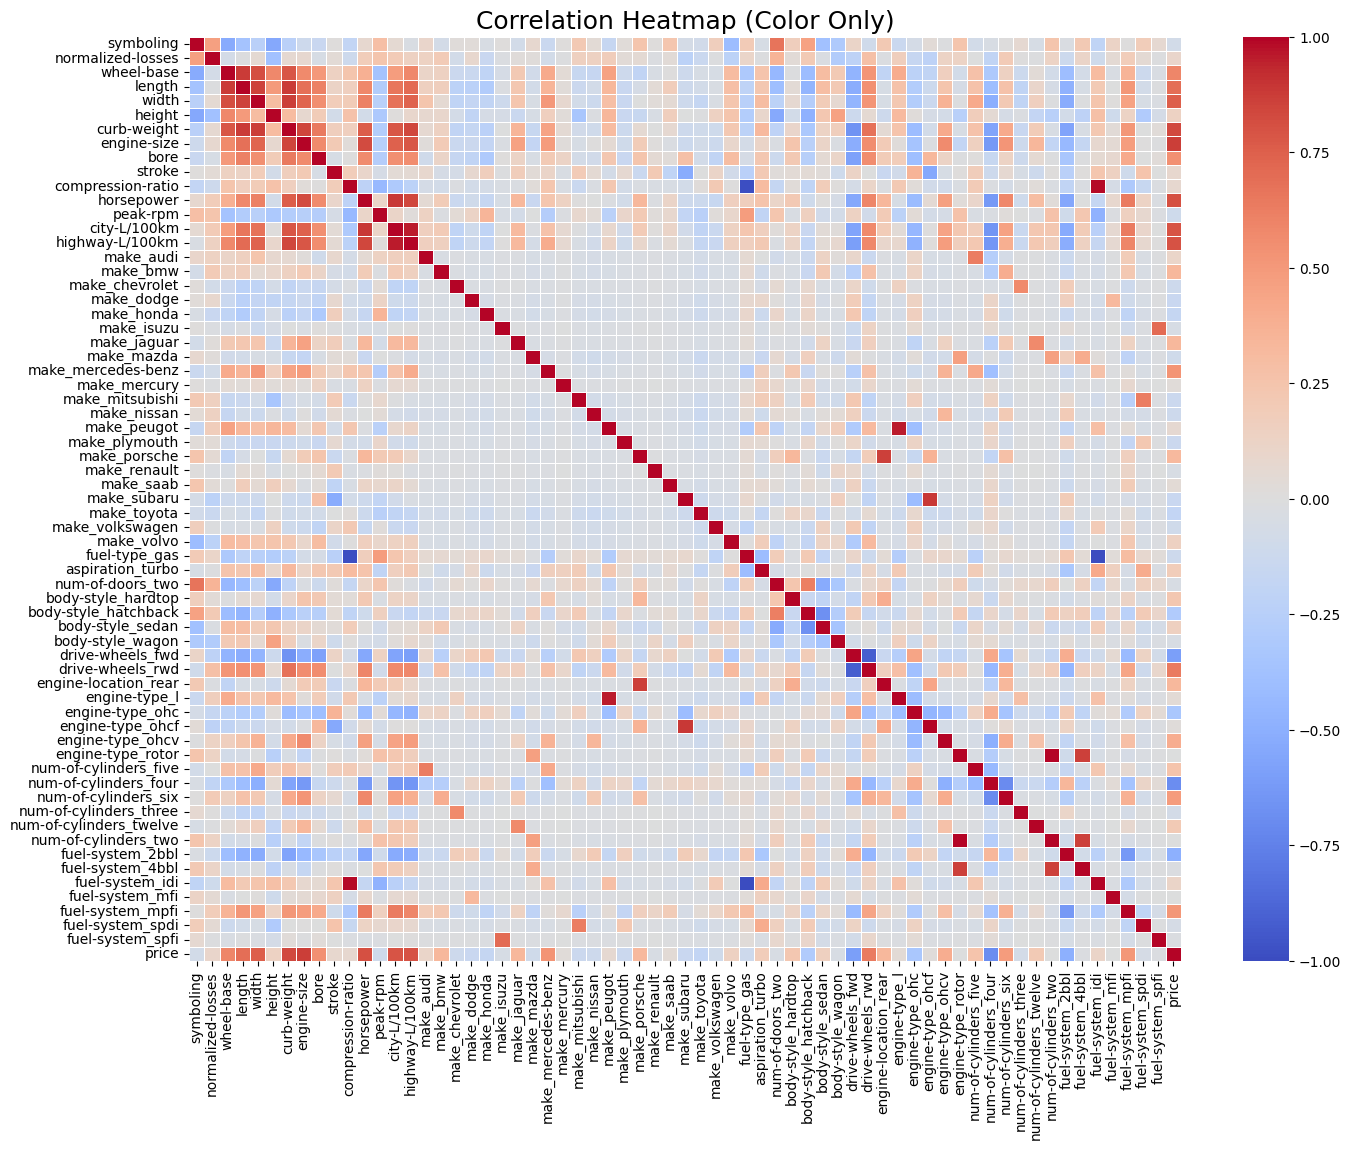

In [19]:
corr_matrix = df.corr()

plt.figure(figsize=(16,12))

# Heatmap without numbers
sns.heatmap(
    corr_matrix,
    annot=False,        # No text
    cmap="coolwarm",    # Diverging colors
    cbar=True,          # Show colorbar
    linewidths=0.5      # Add lines between cells for readability
)

plt.title("Correlation Heatmap (Color Only)", fontsize=18)
plt.show()

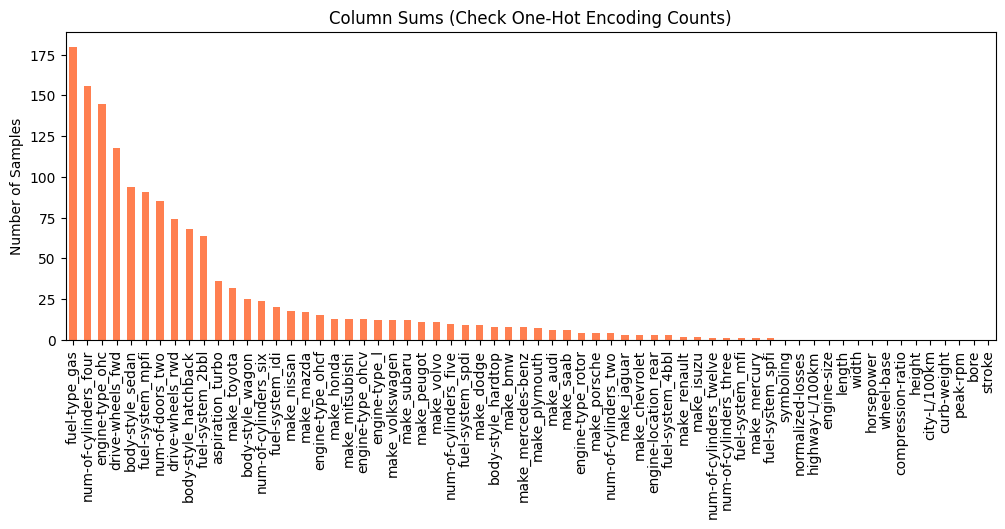

In [20]:
plt.figure(figsize=(12,4))
X.sum().sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title("Column Sums (Check One-Hot Encoding Counts)")
plt.ylabel("Number of Samples")
plt.show()

### Feature Engineering ###

In [22]:
# Compute correlation with target and sort
corr_with_price = df.corr()['price'].sort_values(ascending=False)

# Filter only features with correlation >= 0.3
high_corr_features = corr_with_price[(corr_with_price >= 0.3) & (corr_with_price != 1)]

print(high_corr_features)

engine-size             0.872337
curb-weight             0.834420
horsepower              0.810551
highway-L/100km         0.801313
city-L/100km            0.790291
width                   0.752795
length                  0.691044
drive-wheels_rwd        0.639982
wheel-base              0.589147
bore                    0.543436
make_mercedes-benz      0.525046
fuel-system_mpfi        0.511018
num-of-cylinders_six    0.486329
engine-type_ohcv        0.394572
make_jaguar             0.332216
make_bmw                0.331679
engine-location_rear    0.331098
make_porsche            0.327073
Name: price, dtype: float64


In [24]:
X_high = df[high_corr_features.index]
y = df['price']

### Visualization (EDA) ###

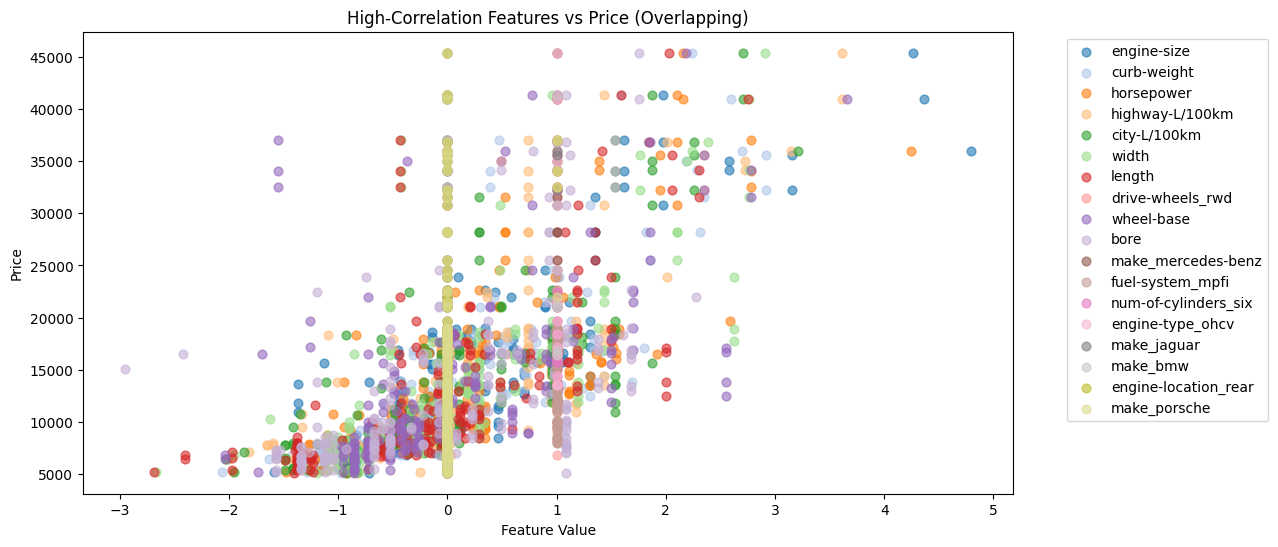

In [25]:
plt.figure(figsize=(12,6))

# Generate a color for each feature
colors = sns.color_palette("tab20", n_colors=len(X_high.columns))

# Plot each high-correlation feature against y
for i, col in enumerate(X_high.columns):
    plt.scatter(X_high[col], y, alpha=0.6, color=colors[i], label=col, s=40)

plt.xlabel("Feature Value")
plt.ylabel("Price")
plt.title("High-Correlation Features vs Price (Overlapping)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # put legend outside plot
plt.show()

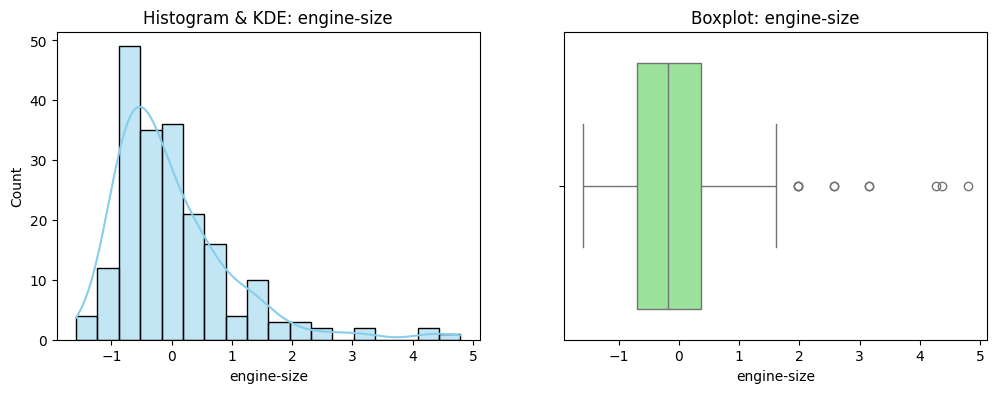

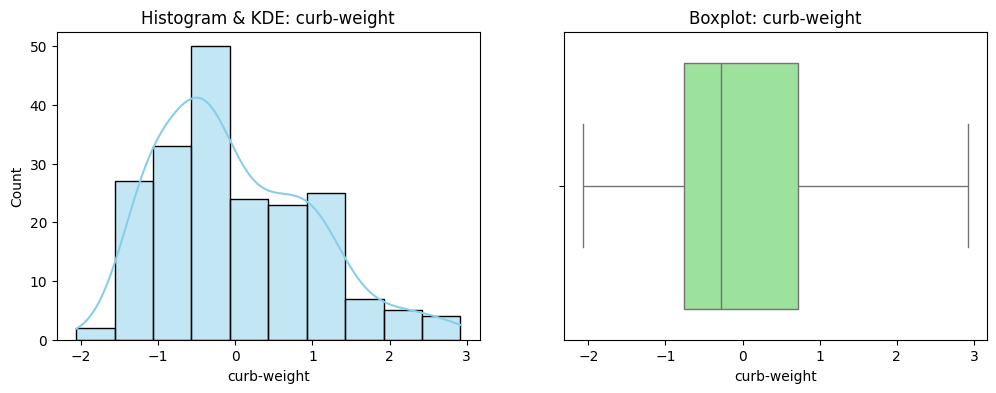

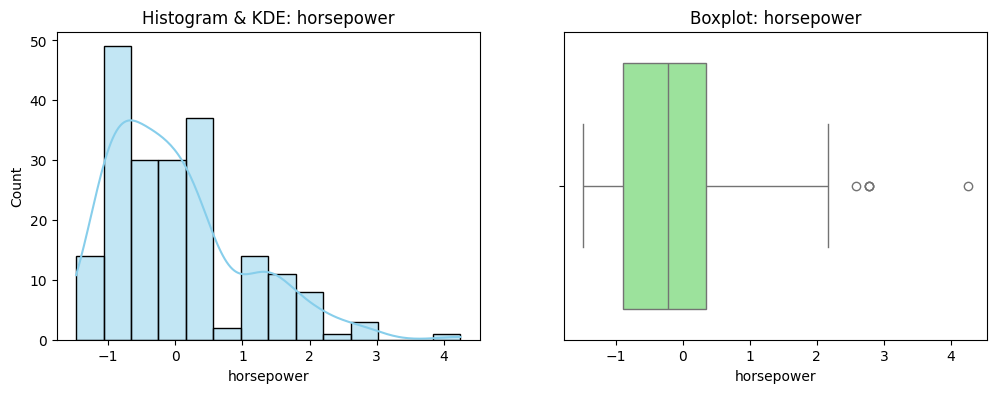

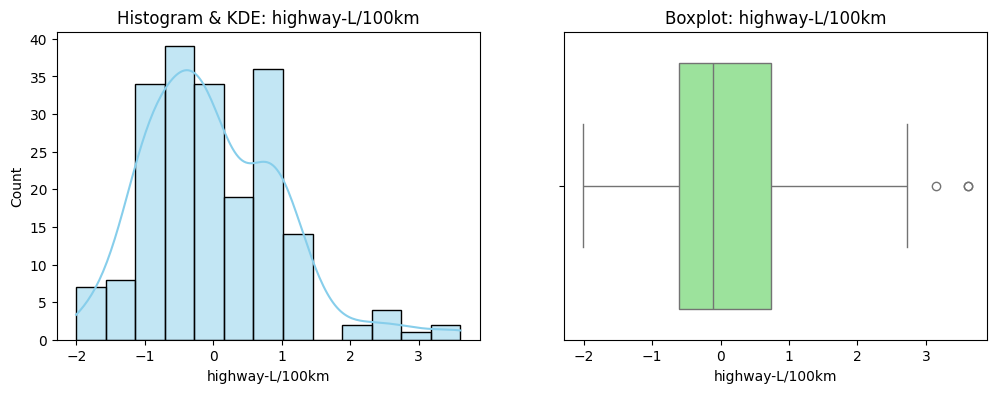

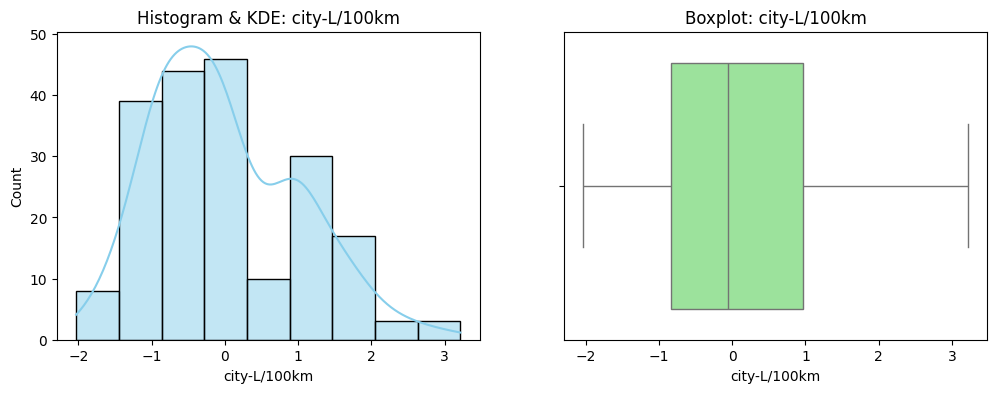

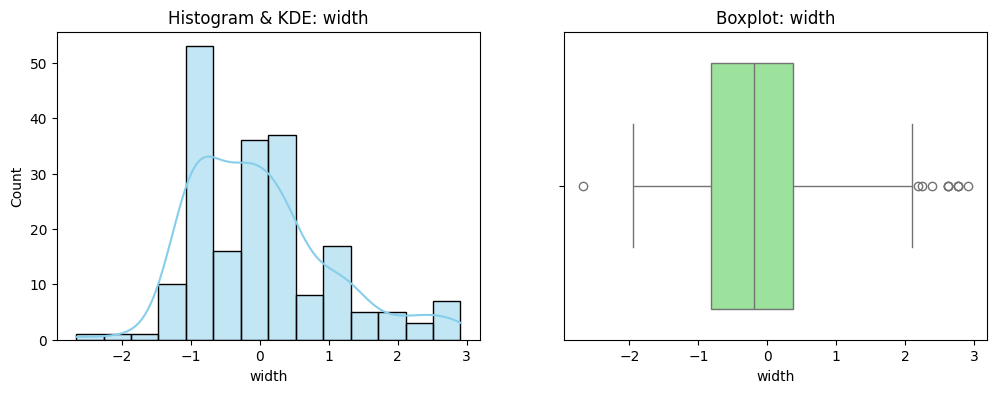

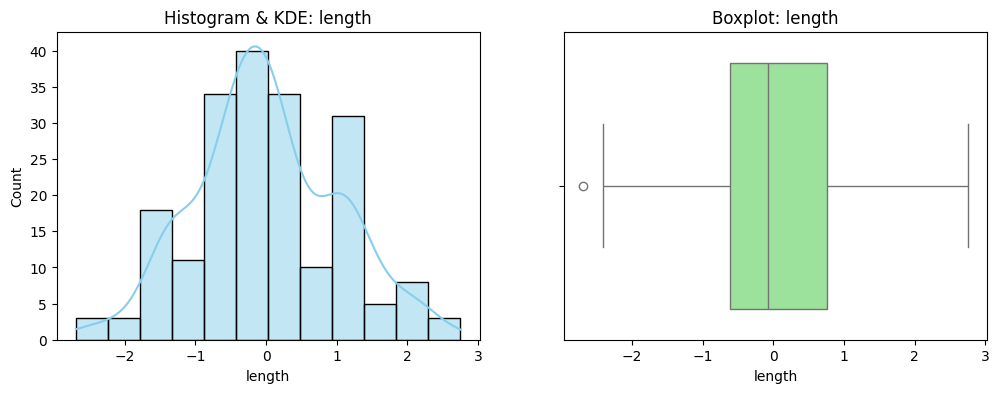

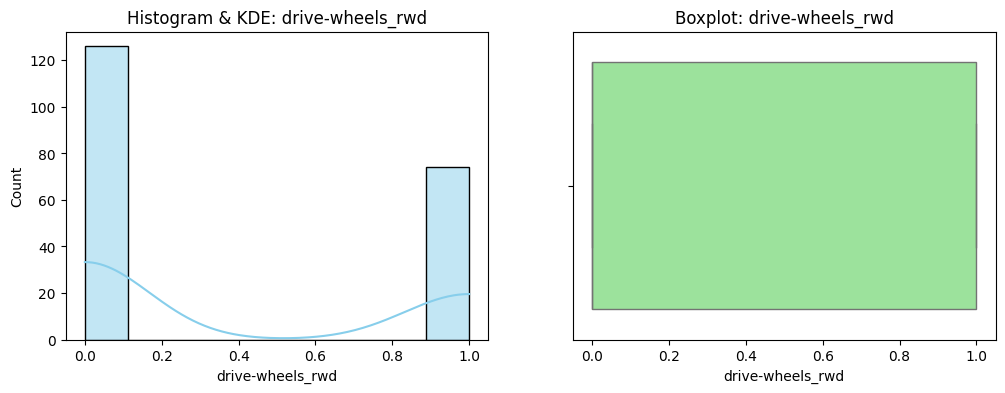

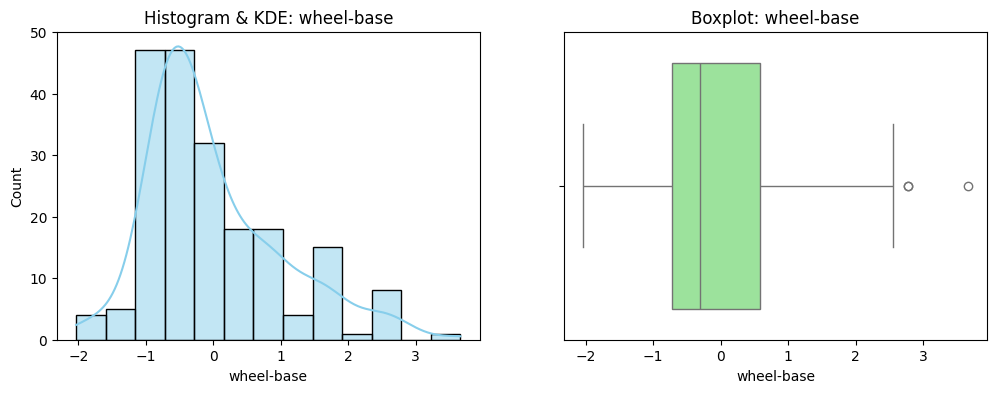

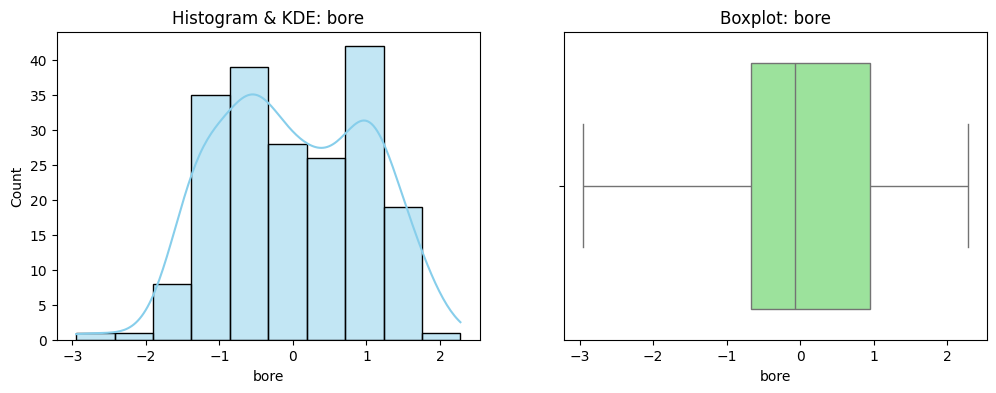

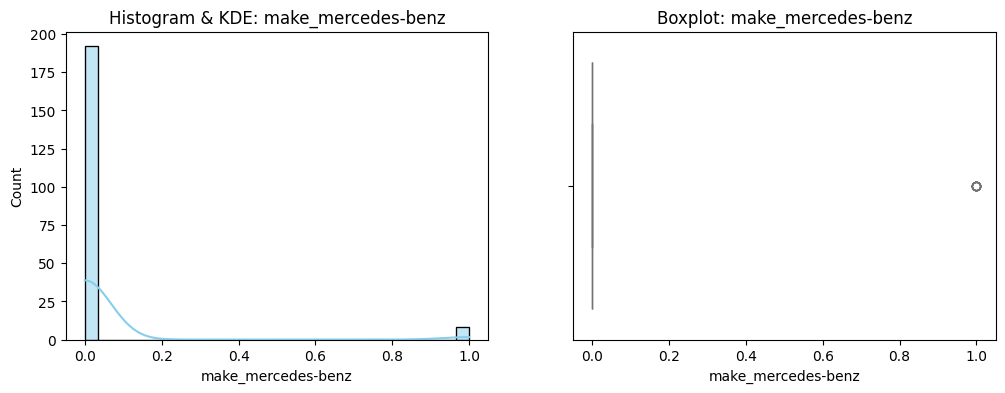

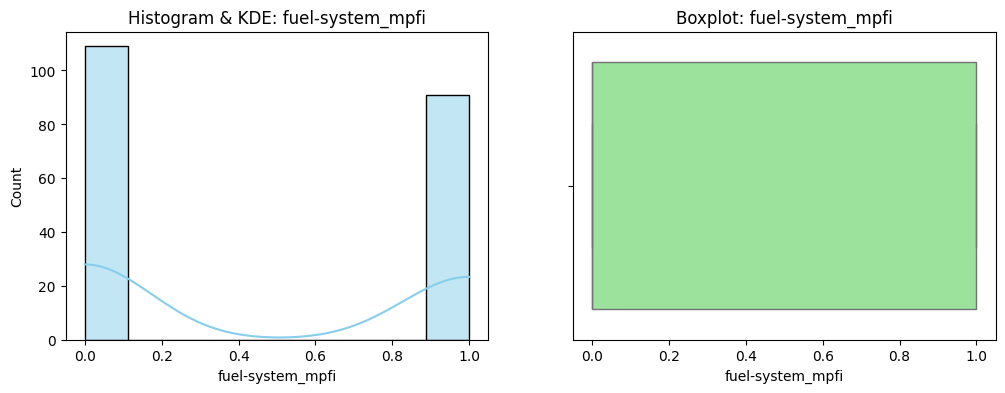

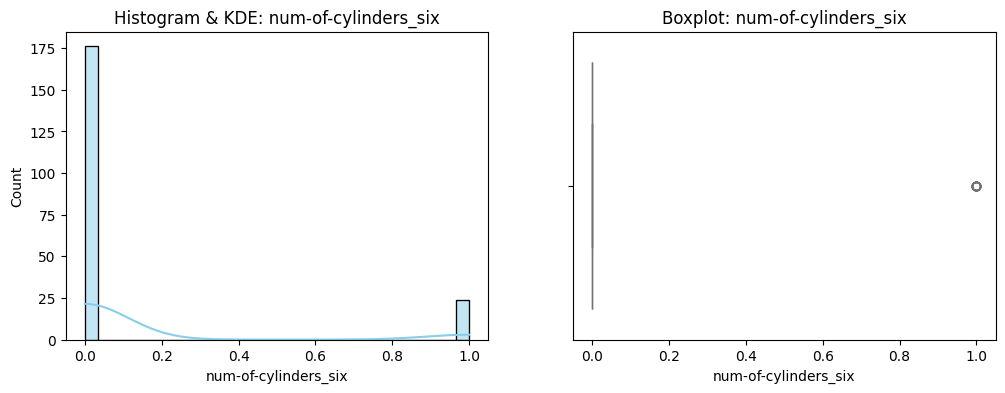

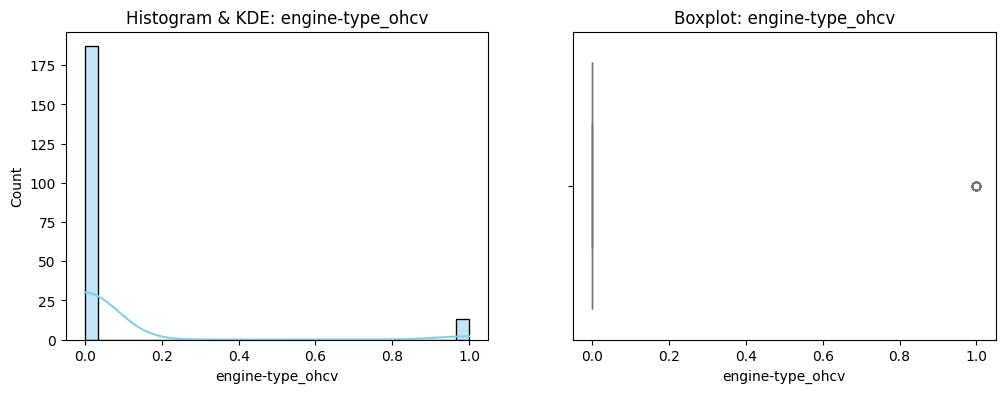

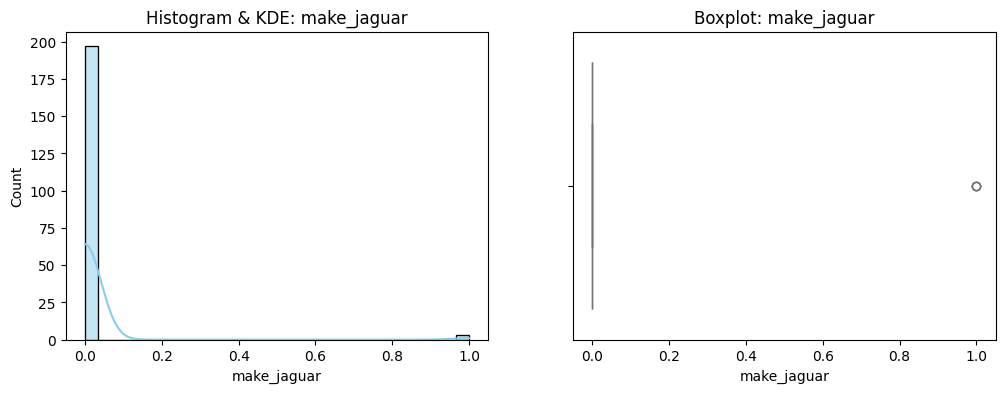

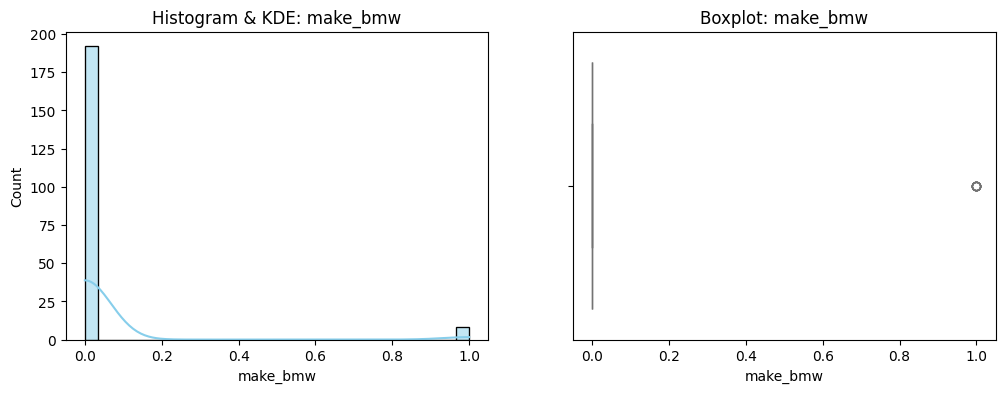

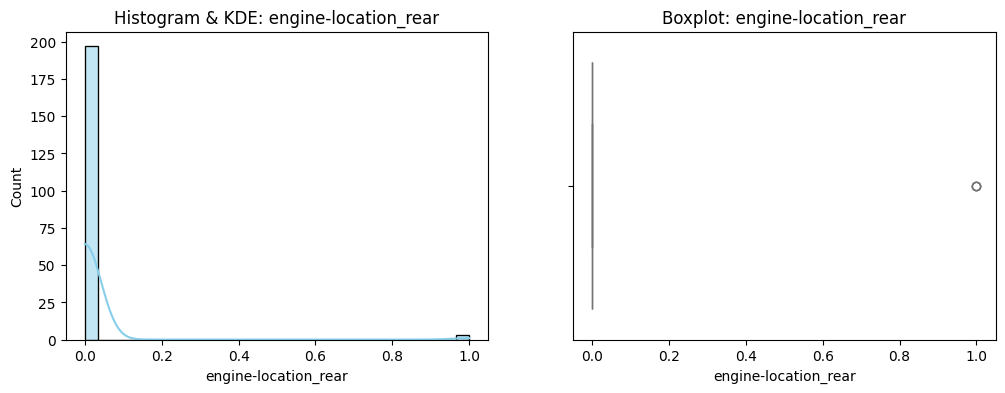

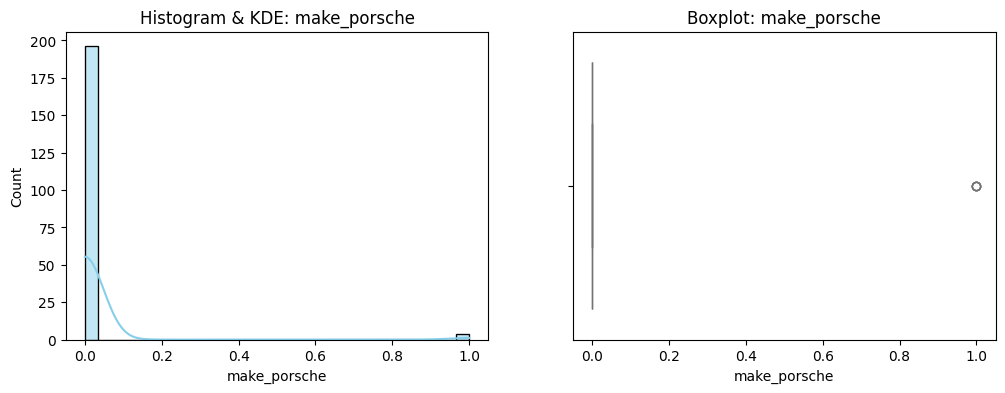

In [26]:
for col in X_high.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    
    # Histogram + KDE
    sns.histplot(X_high[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram & KDE: {col}')
    
    # Boxplot
    sns.boxplot(x=X_high[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot: {col}')
    
    plt.show()

## Modeling ##

Since our processed data set outliers and relation is not linear, we  shal select random forest for regression.

In [27]:
# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_high, y, test_size=0.2, random_state=42
)

# 2. Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=200,  # number of trees
    max_depth=None,    # allow trees to grow fully
    random_state=42
)

# 3. Train the model
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [28]:
print(type(y_test), y_test.dtype)
print(type(y_pred), y_pred.dtype)

<class 'pandas.core.series.Series'> float64
<class 'numpy.ndarray'> float64


## Evaluation ##

Primary metrics - R2_score and mse_score

In [30]:
import sklearn
print(sklearn.__version__)
print(sklearn.__file__)

1.7.2
C:\Users\ahmed\anaconda3\envs\basic-ds\Lib\site-packages\sklearn\__init__.py


In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

RMSE: 3848602.81
R²: 0.966


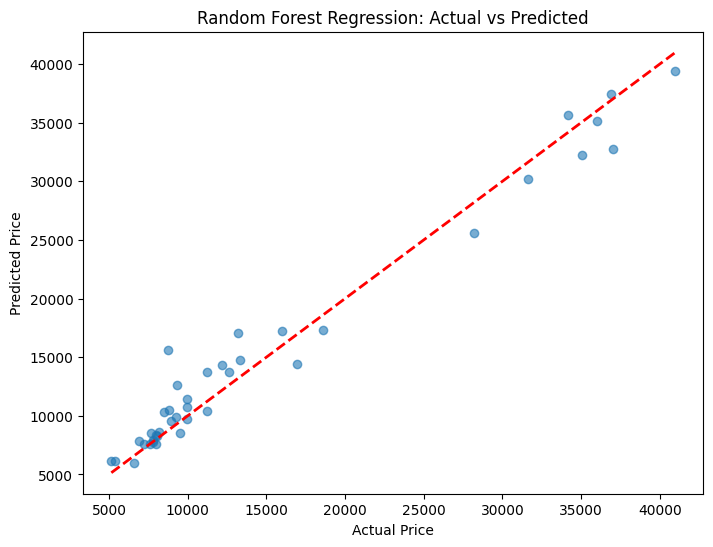

In [32]:
# 5. Evaluate
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# 6. Predicted vs Actual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()